In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, mean_squared_error, r2_score, confusion_matrix, classification_report

In [183]:
# Path to your dataset file
file_path = 'predictive_maintenance.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

In [184]:
# Dropping rows with any missing values
df_cleaned = df.dropna()

In [185]:
# Display the first few rows of the DataFrame
print(df.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  


In [186]:
# Assuming 'X' is your features and 'y' is the target variable
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [187]:
X.iloc[50]

UDI                                   51
Product ID                        L47230
Type                                   L
Air temperature [K]                298.9
Process temperature [K]            309.1
Rotational speed [rpm]              2861
Torque [Nm]                          4.6
Tool wear [min]                      143
Failure Type               Power Failure
Name: 50, dtype: object

# Variance and Bias Analysis

Feature Variances:
 UDI                        8.334167e+06
Air temperature [K]        4.001035e+00
Process temperature [K]    2.201467e+00
Rotational speed [rpm]     3.214279e+04
Torque [Nm]                9.937964e+01
Tool wear [min]            4.051850e+03
Target                     3.275407e-02
dtype: float64
Feature Distributions:



<ipython-input-188-9da879abf958>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_variances = df.var()


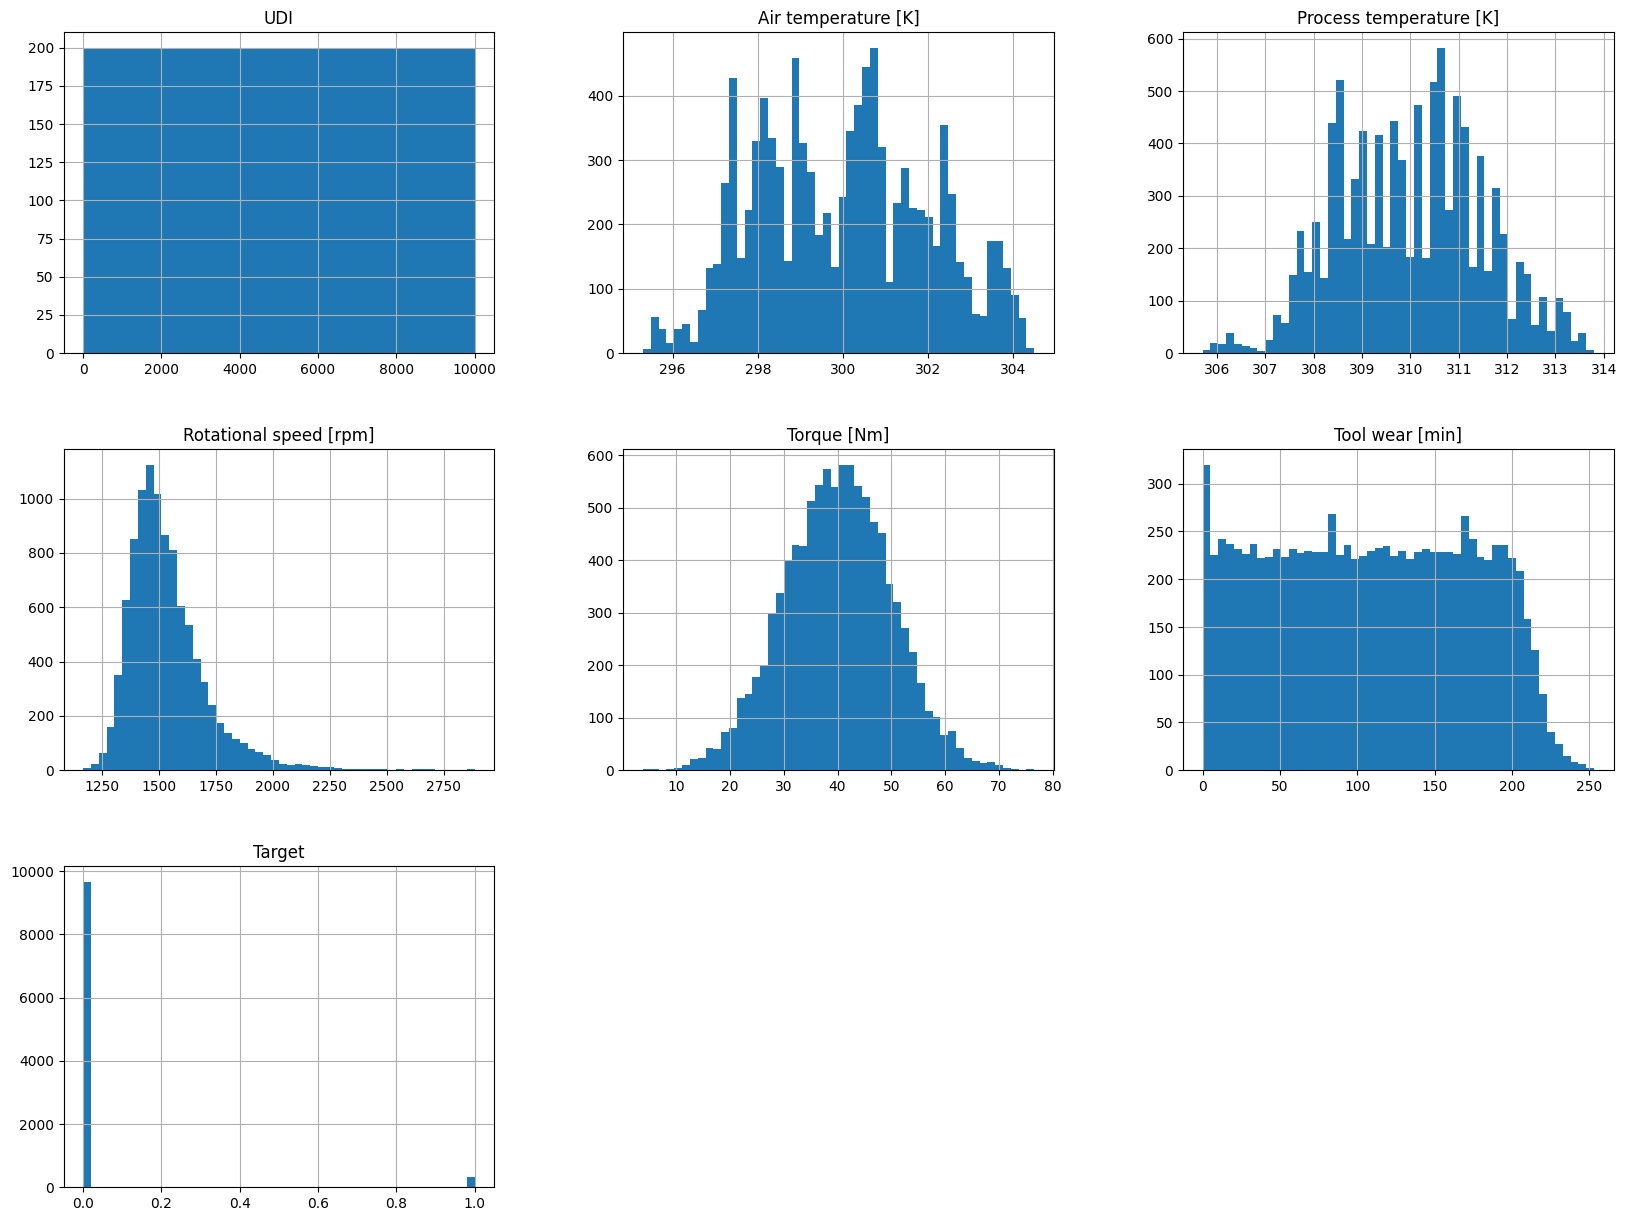

In [188]:
# Analyze variance for each feature
feature_variances = df.var()
print("Feature Variances:\n", feature_variances)

# Bias analysis could involve looking at the distribution of each feature and the target variable
print("Feature Distributions:\n")
df.hist(bins=50, figsize=(20,15))
plt.show()

# Correlation Matrix

<ipython-input-189-f472eae807bd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


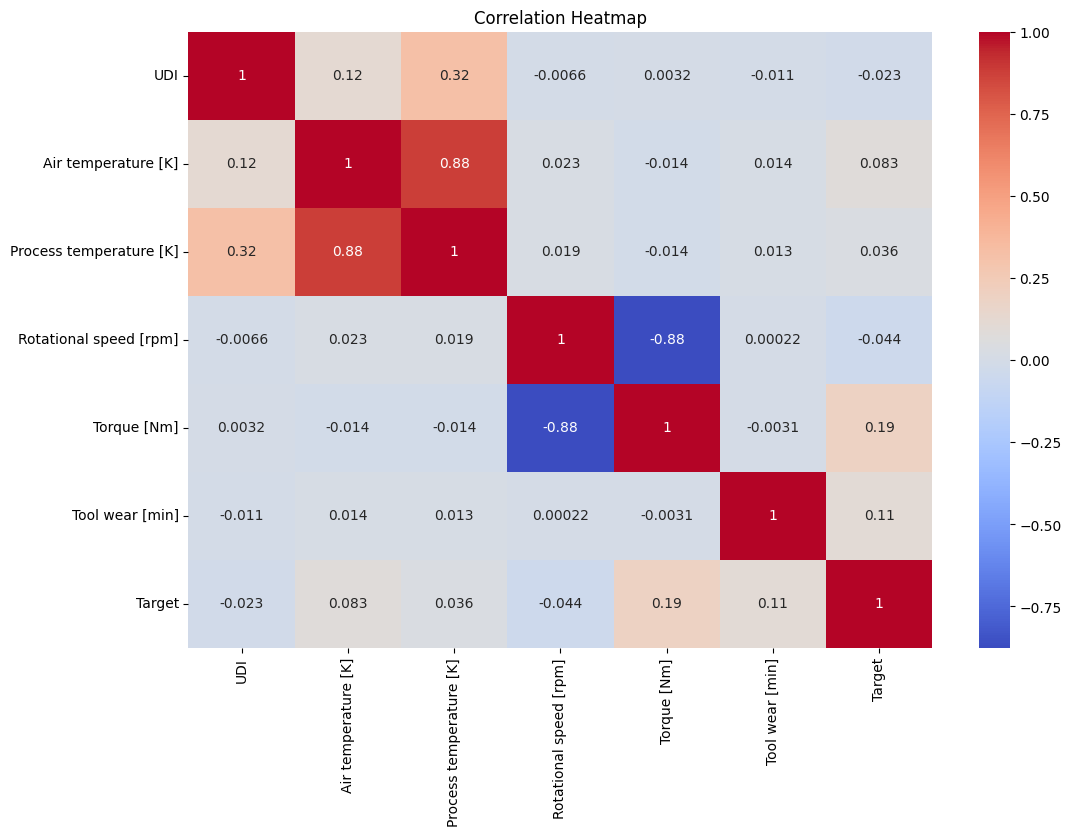

In [189]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering and Selection

In [190]:
X_numeric = X.select_dtypes(exclude=['object'])

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42)

## Polynomial Regression

In [192]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_numeric)  # Assuming 'X' is your feature set

In [193]:
# Assuming you've already created X_poly using PolynomialFeatures
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [194]:
y_pred = model.predict(X_test)

### Visualizing Model Coefficients for Polynomial Features

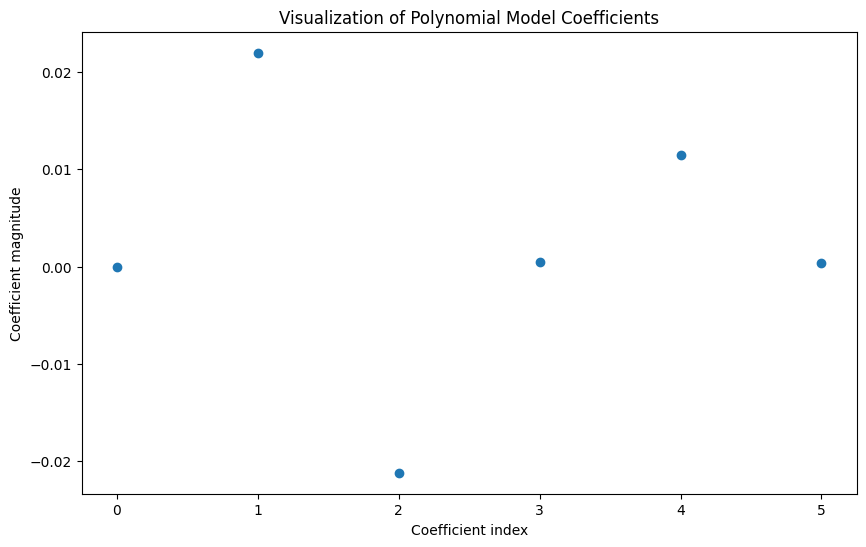

In [195]:
# Get the coefficients
coefficients = model.coef_

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.plot(coefficients, 'o')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.title('Visualization of Polynomial Model Coefficients')
plt.show()

### Performance Metrics

In [196]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.02607685341383596
R-squared: 0.1319000827645408


## L1 Regularization (Lasso)


In [197]:
# Lasso regression model
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso.fit(X_train, y_train)

# Coefficients after L1 regularization
lasso_coef = lasso.coef_

In [198]:
y_pred = lasso.predict(X_test)

### Visualizing Model Coefficients

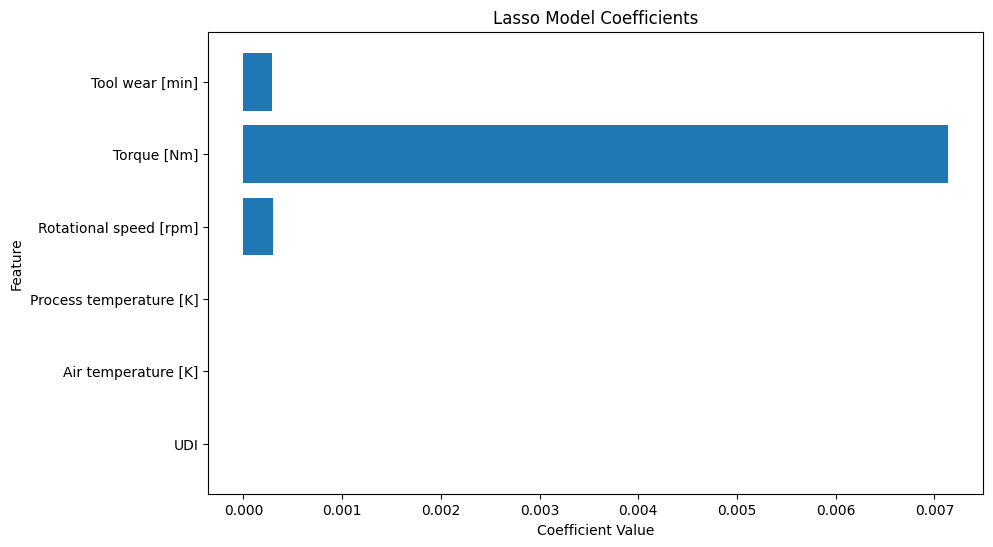

In [199]:
feature_names = X_train.columns

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(lasso_coef)), lasso_coef)
plt.yticks(np.arange(len(lasso_coef)), feature_names)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Lasso Model Coefficients")
plt.show()


### Performance Metrics

In [200]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.026769700382738654
R-squared: 0.10883516819006434


## L2 Regularization (Ridge)


In [201]:
# Ridge regression model
ridge = Ridge(alpha=0.1)  # alpha is the regularization strength
ridge.fit(X_train, y_train)

# Similarly, you can check the coefficients
ridge_coef = ridge.coef_

In [202]:
y_pred_ridge = ridge.predict(X_test)

### Ridge Model Coefficients

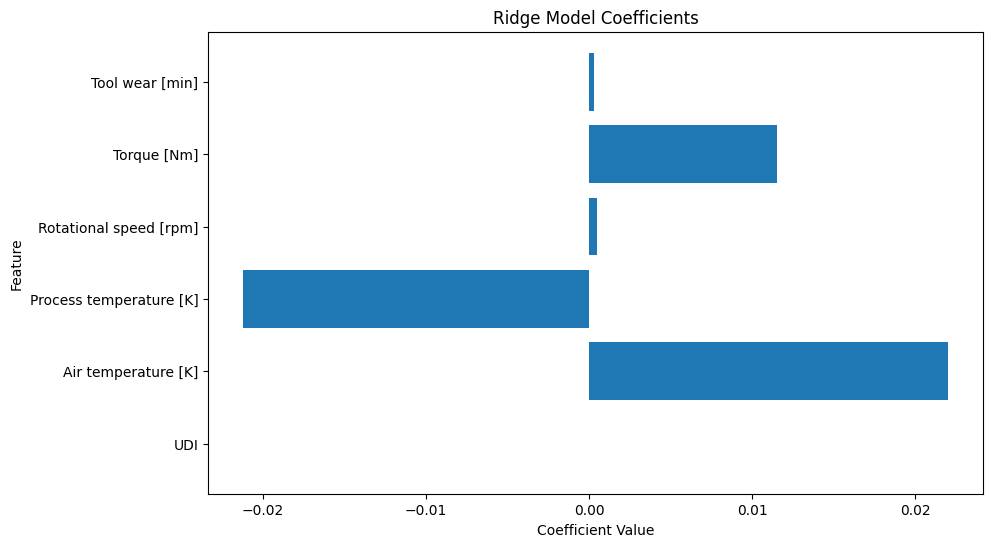

In [203]:
feature_names = X_train.columns

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(ridge.coef_)), ridge.coef_)
plt.yticks(np.arange(len(ridge.coef_)), feature_names)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Ridge Model Coefficients")
plt.show()


### Performance Metrics

In [204]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error - Ridge: {mse_ridge}")
print(f"R-squared - Ridge: {r2_ridge}")

Mean Squared Error - Ridge: 0.026076843199065114
R-squared - Ridge: 0.13190042281483683


# Binary Classification using logistic Regression

In [205]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [206]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.97
Precision: 0.73
Recall: 0.26
F1 Score: 0.38
ROC-AUC Score: 0.63


# Predictive Maintenance using Monte Carlo Estimation

In [207]:
# Calculate the total number of observations
total_observations = len(df)

In [208]:
simulated_failures = 0
failure_cases = df[df['Target'] == 1]
threshold_air_temp = failure_cases['Air temperature [K]'].mean()
threshold_process_temp = failure_cases['Process temperature [K]'].mean()
threshold_rot_speed = failure_cases['Rotational speed [rpm]'].mean()
threshold_torque = failure_cases['Torque [Nm]'].mean()
threshold_tool_wear = failure_cases['Tool wear [min]'].mean()

for _ in range(total_observations):
    # Generate a random scenario based on the distribution of each feature
    air_temp = np.random.normal(df['Air temperature [K]'].mean(), df['Air temperature [K]'].std())
    process_temp = np.random.normal(df['Process temperature [K]'].mean(), df['Process temperature [K]'].std())
    rotational_speed = np.random.normal(df['Rotational speed [rpm]'].mean(), df['Rotational speed [rpm]'].std())
    torque = np.random.normal(df['Torque [Nm]'].mean(), df['Torque [Nm]'].std())
    tool_wear = np.random.normal(df['Tool wear [min]'].mean(), df['Tool wear [min]'].std())

    # This is an example criterion, you should define it based on your domain knowledge
    if (air_temp > threshold_air_temp or rotational_speed > threshold_rot_speed or process_temp > threshold_process_temp
        or torque > threshold_torque or tool_wear > threshold_tool_wear):
        simulated_failures += 1

# Calculate the estimated probability of failure
estimated_failure_probability = simulated_failures / total_observations
print(f"Estimated Failure Probability: {estimated_failure_probability}")

# Calculate the actual failure probability
total_failures = (df['Target'] == 1).sum()
actual_failure_probability = total_failures / len(df)
print(f"Actual Failure Probability: {actual_failure_probability}")

Estimated Failure Probability: 0.9026
Actual Failure Probability: 0.0339


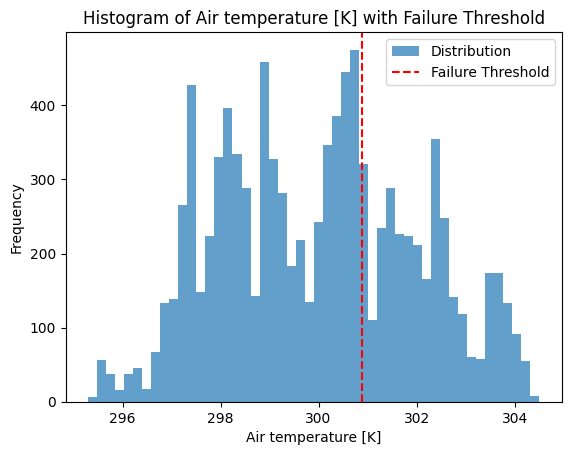

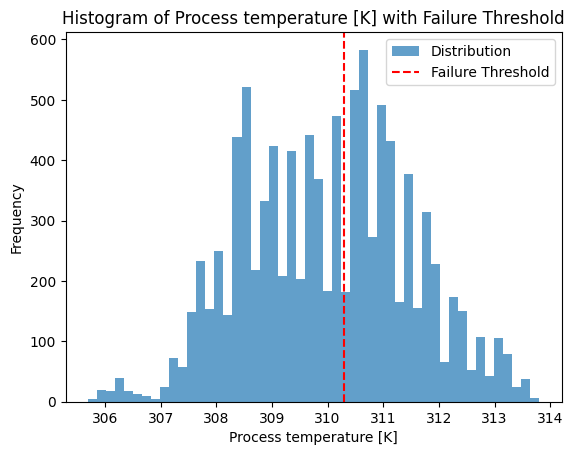

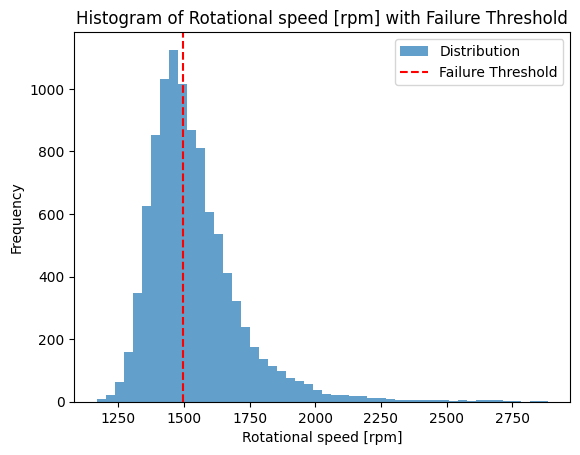

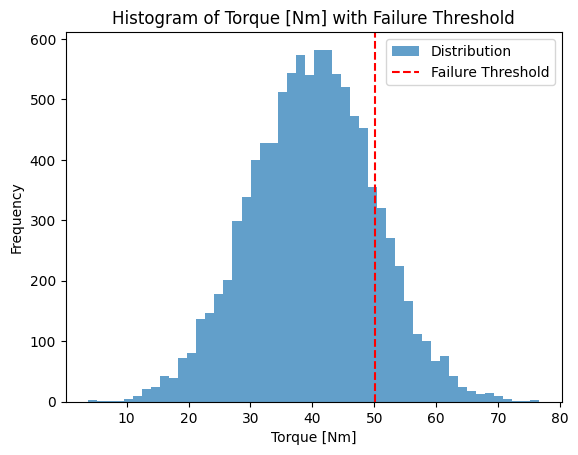

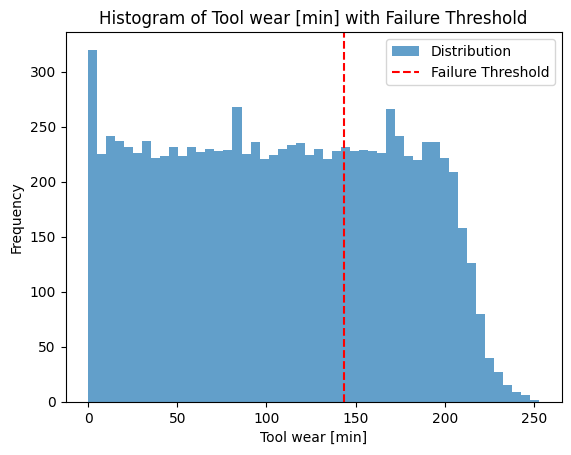

In [209]:
# Plotting histograms for each feature with failure thresholds
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
thresholds = [threshold_air_temp, threshold_process_temp, threshold_rot_speed, threshold_torque, threshold_tool_wear]

for feature, threshold in zip(features, thresholds):
    plt.hist(df[feature], bins=50, alpha=0.7, label='Distribution')
    plt.axvline(x=threshold, color='r', linestyle='--', label='Failure Threshold')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature} with Failure Threshold')
    plt.legend()
    plt.show()

#  Predictive Maintenance using Random Forest Classifier

In [210]:
# Selecting features and target for the model
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Target'
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [211]:
# Train a RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Monte Carlo Simulation to estimate failure probability
num_simulations = 10000
simulated_failures = 0

for _ in range(num_simulations):
    # Generate a random operational scenario
    random_scenario = {
        'Air temperature [K]': np.random.normal(df['Air temperature [K]'].mean(), df['Air temperature [K]'].std()),
        'Process temperature [K]': np.random.normal(df['Process temperature [K]'].mean(), df['Process temperature [K]'].std()),
        'Rotational speed [rpm]': np.random.normal(df['Rotational speed [rpm]'].mean(), df['Rotational speed [rpm]'].std()),
        'Torque [Nm]': np.random.normal(df['Torque [Nm]'].mean(), df['Torque [Nm]'].std()),
        'Tool wear [min]': np.random.normal(df['Tool wear [min]'].mean(), df['Tool wear [min]'].std())
    }
    scenario_df = pd.DataFrame([random_scenario])

    # Predict failure probability for this scenario
    failure_prediction = random_forest.predict(scenario_df)[0]
    if failure_prediction == 1:
        simulated_failures += 1

# Calculate the estimated probability of failure
estimated_failure_probability = simulated_failures / num_simulations
print(f"Estimated Failure Probability: {estimated_failure_probability}")

# Calculate the actual failure probability
total_failures = (df['Target'] == 1).sum()
actual_failure_probability = total_failures / len(df)
print(f"Actual Failure Probability: {actual_failure_probability}")

Estimated Failure Probability: 0.0548
Actual Failure Probability: 0.0339


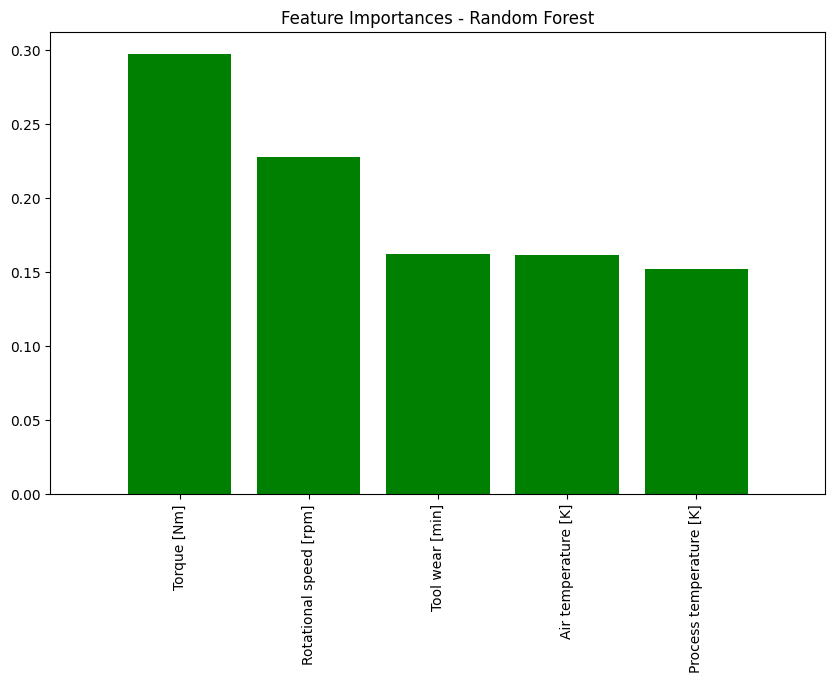

In [213]:
importances_rf = random_forest.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], color="g", align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices_rf], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Random Forest - Accuracy: 0.9863333333333333
Random Forest - Precision: 0.8823529411764706
Random Forest - Recall: 0.6451612903225806
Random Forest - F1 Score: 0.7453416149068324
Random Forest - ROC AUC Score: 0.962975909095953


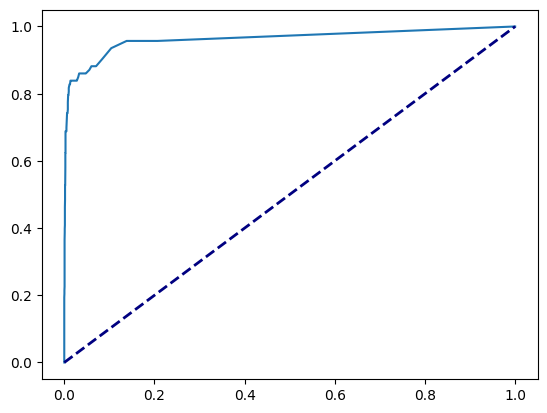

In [214]:
# Assuming your Random Forest model is stored in a variable named 'random_forest'
y_pred_rf = random_forest.predict(X_test)
y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Printing Metrics
print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - Precision:", precision_rf)
print("Random Forest - Recall:", recall_rf)
print("Random Forest - F1 Score:", f1_rf)
print("Random Forest - ROC AUC Score:", roc_auc_rf)

# Predictive Maintenance using Logistic Regression

In [215]:
# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Estimate failure probability on the test set
y_pred_probability = logreg.predict_proba(X_test)[:, 1]  # Probabilities of the positive class (failure)

# Calculate the average estimated failure probability
average_estimated_failure_probability = y_pred_probability.mean()
print(f"Average Estimated Failure Probability: {average_estimated_failure_probability}")

# Calculate the actual failure probability from the dataset
total_failures = (df['Target'] == 1).sum()
actual_failure_probability = total_failures / len(df)
print(f"Actual Failure Probability: {actual_failure_probability}")

Average Estimated Failure Probability: 0.034074614126748
Actual Failure Probability: 0.0339


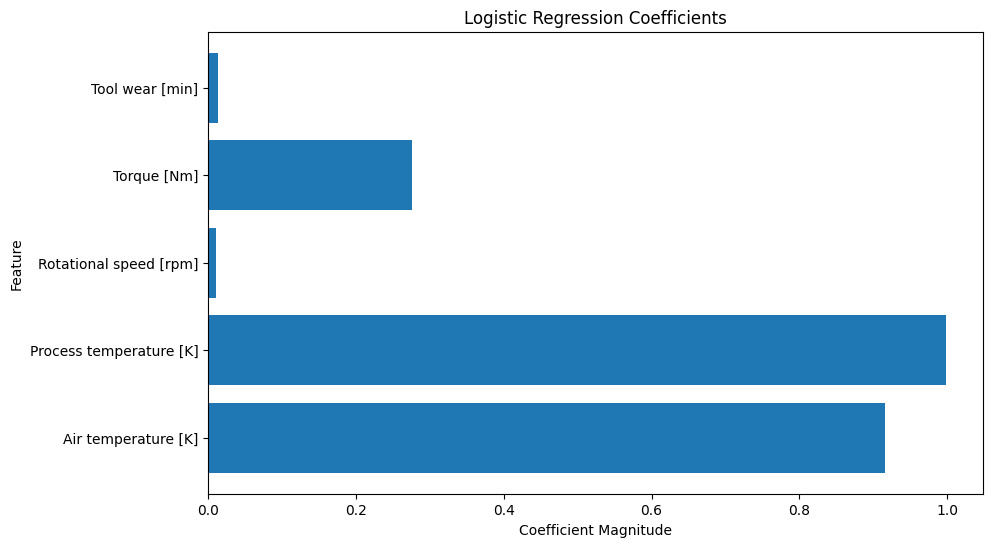

In [216]:
# Assuming your Logistic Regression model is named 'logreg' and you have feature names in 'features'
coef_magnitude = abs(logreg.coef_[0])

plt.figure(figsize=(10, 6))
plt.barh(range(len(coef_magnitude)), coef_magnitude, align='center')
plt.yticks(range(len(coef_magnitude)), features)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

Logistic Regression - Accuracy: 0.9736666666666667
Logistic Regression - Precision: 0.6944444444444444
Logistic Regression - Recall: 0.26881720430107525
Logistic Regression - F1 Score: 0.3875968992248062
Logistic Regression - ROC AUC Score: 0.8916075768168049


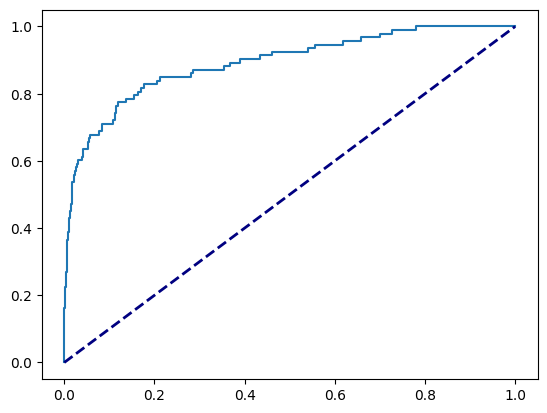

In [217]:
# Assuming your Logistic Regression model is stored in a variable named 'logreg'
y_pred_logreg = logreg.predict(X_test)
y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]

# Metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# ROC Curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


# Printing Metrics
print("Logistic Regression - Accuracy:", accuracy_logreg)
print("Logistic Regression - Precision:", precision_logreg)
print("Logistic Regression - Recall:", recall_logreg)
print("Logistic Regression - F1 Score:", f1_logreg)
print("Logistic Regression - ROC AUC Score:", roc_auc_logreg)

# Predictive Maintenance using Decision Trees

In [218]:
# Initialize and train the Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Estimate failure probability on the test set
y_pred_proba_tree = tree_model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class (failure)

# Calculate the average estimated failure probability
average_estimated_failure_probability_tree = y_pred_proba_tree.mean()
print(f"Average Estimated Failure Probability (Decision Tree): {average_estimated_failure_probability_tree}")

# Calculate the actual failure probability from the dataset
total_failures_tree = (df['Target'] == 1).sum()
actual_failure_probability_tree = total_failures_tree / len(df)
print(f"Actual Failure Probability: {actual_failure_probability_tree}")

Average Estimated Failure Probability (Decision Tree): 0.03233333333333333
Actual Failure Probability: 0.0339


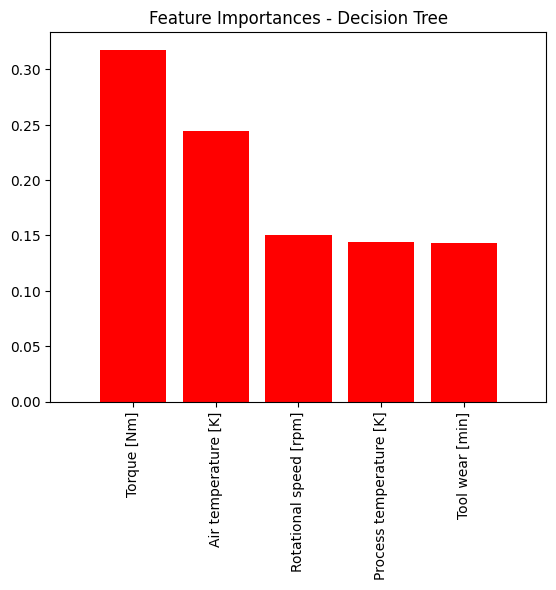

In [219]:
# Plotting feature importance
importances = tree_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances - Decision Tree")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Decision Tree - Accuracy: 0.9766666666666667
Decision Tree - Precision: 0.6185567010309279
Decision Tree - Recall: 0.6451612903225806
Decision Tree - F1 Score: 0.6315789473684211
Decision Tree - ROC AUC Score: 0.8162166960728829


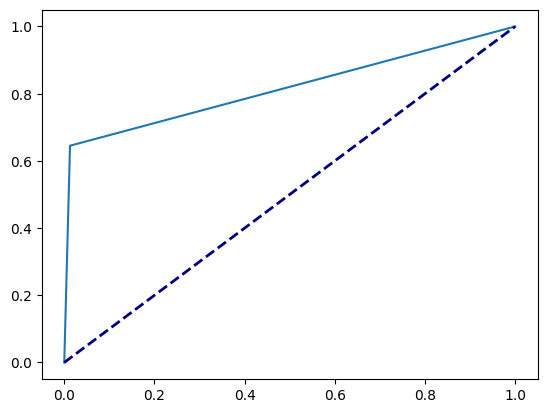

In [220]:
# Assuming your Decision Tree model is stored in a variable named 'decision_tree'
y_pred_dt = tree_model.predict(X_test)
y_pred_proba_dt = tree_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


# Printing Metrics
print("Decision Tree - Accuracy:", accuracy_dt)
print("Decision Tree - Precision:", precision_dt)
print("Decision Tree - Recall:", recall_dt)
print("Decision Tree - F1 Score:", f1_dt)
print("Decision Tree - ROC AUC Score:", roc_auc_dt)

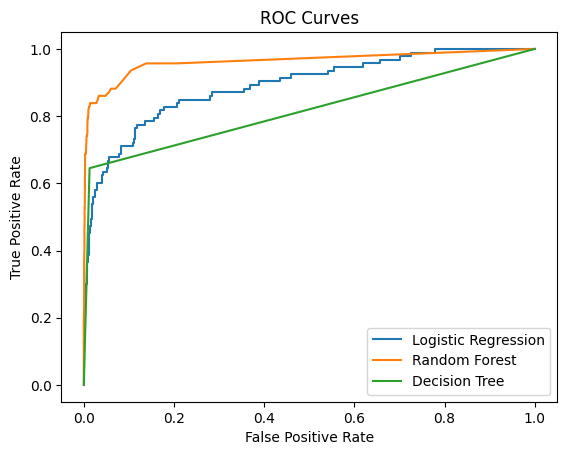

In [221]:
# Assuming you also have predictions for Random Forest and Decision Tree
# Add their ROC curves to the plot
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)

plt.figure()
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Support Vector Machines

In [222]:
  # Encode categorical features
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

In [223]:
# Feature scaling
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [224]:
# Linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

In [225]:
# Evaluation of Linear SVM
print("Linear SVM Classification Report:\n", classification_report(y_test, y_pred_linear))

Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2907
           1       0.85      0.24      0.37        93

    accuracy                           0.97      3000
   macro avg       0.91      0.62      0.68      3000
weighted avg       0.97      0.97      0.97      3000



In [226]:
# Non-linear SVM
non_linear_svm = SVC(kernel='rbf')
non_linear_svm.fit(X_train, y_train)
y_pred_non_linear = non_linear_svm.predict(X_test)

In [227]:
# Evaluation of Non-Linear SVM
print("Non-Linear SVM Classification Report:\n", classification_report(y_test, y_pred_non_linear))

Non-Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2907
           1       1.00      0.01      0.02        93

    accuracy                           0.97      3000
   macro avg       0.98      0.51      0.50      3000
weighted avg       0.97      0.97      0.95      3000



In [228]:
# Example: Selecting the first two features for simplicity
X_train_2d = X_train.iloc[:, :2]
X_test_2d = X_test.iloc[:, :2]


In [229]:
# Train a linear SVM
svm_model_2d = SVC(kernel='linear')
svm_model_2d.fit(X_train_2d, y_train)


SVC(kernel='linear')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


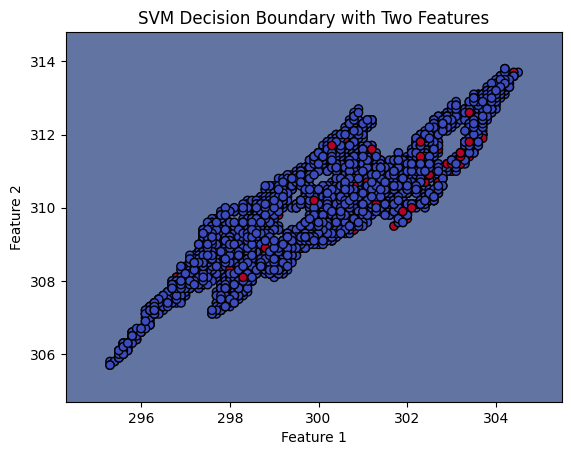

In [230]:
# Create meshgrid for plotting
x_min, x_max = X_train_2d.iloc[:, 0].min() - 1, X_train_2d.iloc[:, 0].max() + 1
y_min, y_max = X_train_2d.iloc[:, 1].min() - 1, X_train_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Plot decision boundary
Z = svm_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot data points
plt.scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM Decision Boundary with Two Features')
plt.show()


## Hinge loss

In [231]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [232]:
decision_scores = svm_model.decision_function(X_train)

In [233]:
# Hige loss for SVM model
def hinge_loss(y_true, decision_scores):
    return np.mean(np.maximum(0, 1 - y_true * decision_scores))

# Calculate hinge loss
y_train_modified = np.where(y_train == 0, -1, 1)
loss = hinge_loss(y_train_modified, decision_scores)
print("Hinge Loss:", loss)

Hinge Loss: 0.12248358085782048


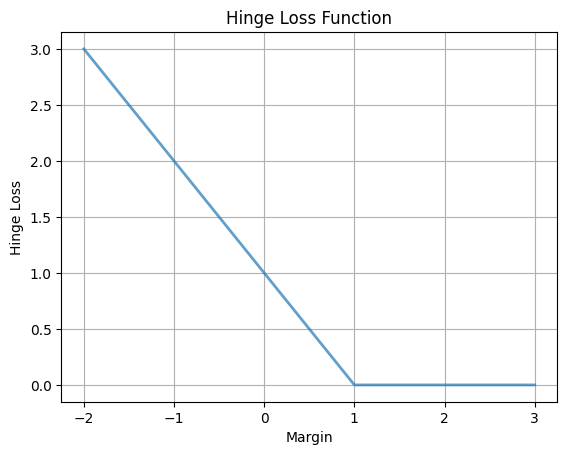

In [234]:
# Hinge loss of 'margin' variable
def hinge_loss_function(margin):
    return np.maximum(0, 1 - margin)

# Create a range of values for the margin
margin_values = np.linspace(-2, 3, 400)

# Calculate hinge loss for each margin value
hinge_losses = hinge_loss_function(margin_values)

# Plotting
plt.plot(margin_values, hinge_losses, linewidth=2, alpha=0.7)
plt.title("Hinge Loss Function")
plt.xlabel("Margin")
plt.ylabel("Hinge Loss")
plt.grid(True)
plt.show()

# Gaussian Discriminant Analysis

In [235]:
# Selecting features and target for the model
features = ['Air temperature [K]', 'Process temperature [K]']
target = 'Target'

# Prepare the feature matrix X and the target vector y
X = df[features].values
y = df[target].values

In [236]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [237]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [238]:
# Initialize and fit the GDA model
gda = QuadraticDiscriminantAnalysis()
gda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [239]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, gda.predict(X_test))

In [240]:
# Create a mesh to plot the decision boundaries
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [241]:
# Predict on the mesh grid to get the decision boundaries
Z = gda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

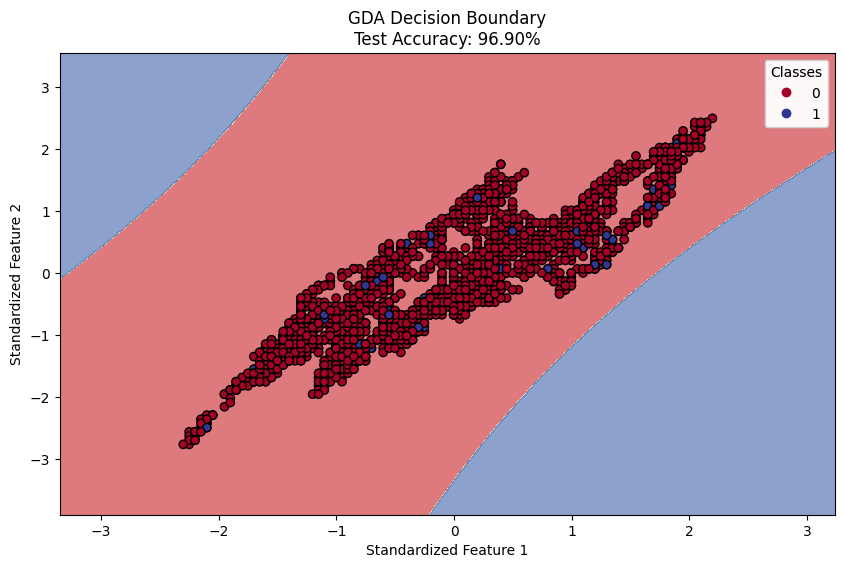

In [242]:
# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)

# Scatter the test data points
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolors='k')

# Add labels and title to the plot
plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.title(f'GDA Decision Boundary\nTest Accuracy: {accuracy:.2%}')

# Create a legend for the scatter plot
legend = plt.legend(*scatter.legend_elements(), loc='best', title='Classes')
plt.gca().add_artist(legend)

# Show the plot
plt.show()